
<h1 id="Introduction:-Unconstrained Optimization">Introduction: Unconstrained Optimization<a class="anchor-link" href="#Introduction:-Unconstrained Optimization">¶</a></h1><p>This notebook explores introductory level algorithms and tools that can be used for non linear optimization. It starts with root finding algorithms in 1 dimensions using a simple example and then moves onto optimization methods (minimum finding) and multidimensional cases. For each example, a graph of the function and a visualization of the steps taken by the optimization algorithm are shown.</p>
<p>Of interest are the worked examples done with "pen and paper" as well as the direct implementations using python and numpy only. A study of the optimization of the well known Rosenbrock function is done using both the Gradient Descent and Newton Rapshon approaches.</p>
<h3 id="Sources">Sources<a class="anchor-link" href="#Sources">¶</a></h3><p>The following is a collection of sources of interest which were used to build this notebook:</p>
<ul>
<li><a href="https://people.duke.edu/~ccc14/sta-663/OptimizationInOneDimension.html">Duke university: Optimization and Non-linear Methods</a></li>
<li><a href="http://ruder.io/optimizing-gradient-descent/">Sebastien Ruder's blog</a></li>
<li><a href="https://github.com/maeehart/TIES483">Nonlinear Optimization course at the University of Jyväskylä</a></li>
<li><a href="http://www.numerical-tours.com/python/">Numerical python tours</a></li>
<li><a href="http://louistiao.me/notes/visualizing-and-animating-optimization-algorithms-with-matplotlib/">Louis Tiao's blog: visualizing-and-animating-optimization-algorithms-with-matplotlib</a></li>
</ul>
<h3 id="Libraries">Libraries<a class="anchor-link" href="#Libraries">¶</a></h3>


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np
from mpl_toolkits import mplot3d


<h1 id="Finding-extrema-of-a-function">Finding extrema of a function<a class="anchor-link" href="#Finding-extrema-of-a-function">¶</a></h1><p>In this section, we are concerned in <em>optimizing</em> a function. As a result the algorithms will try to find local / global minimum and maximum points. A well known function used to compare optimization algorithms is the Rosenbrock function, described next.</p>



<h2 id="Introducing-the-Rosenbrock-function">Introducing the <a href="https://en.wikipedia.org/wiki/Rosenbrock_function">Rosenbrock function</a><a class="anchor-link" href="#Introducing-the-Rosenbrock-function">¶</a></h2><p>In mathematical optimization, the Rosenbrock function is a non-convex function, introduced by Howard H. Rosenbrock in 1960, which is used as a performance test problem for optimization algorithms. It is also known as Rosenbrock's valley or Rosenbrock's banana function.</p>
<p>The global minimum is inside a long, narrow, parabolic shaped flat valley. To find the valley is trivial. To converge to the global minimum, however, is difficult.</p>
<p><strong>The function is defined by:</strong></p>
<p>$f(x,y) = (a - x)^2 + b(y - x^2)^2$ and has a global minimum at $(x,y) = (a,a^2)$. Usually we choose parameters $(a,b) = (1, 100)$ giving:</p>
<p>$f(x,y) = (1 - x)^2 + 100(y - x^2)^2$ with minimum at $(1,1)$</p>
<p><strong>Gradient</strong></p>
<p>$\nabla f = [-400xy + 400x^3 + 2x -2, 200y - 200x^2]$</p>
<p><strong>Hessian</strong></p>
<p>$H = \begin{bmatrix}-400y + 1200x^2 + 2 & -400x \\ -400x & 200 \end{bmatrix} $</p>


In [2]:
def Rosenbrock(x,y):
    return (1 + x)**2 + 100*(y - x**2)**2

def Grad_Rosenbrock(x,y):
    g1 = -400*x*y + 400*x**3 + 2*x -2
    g2 = 200*y -200*x**2
    return np.array([g1,g2])

def Hessian_Rosenbrock(x,y):
    h11 = -400*y + 1200*x**2 + 2
    h12 = -400 * x
    h21 = -400 * x
    h22 = 200
    return np.array([[h11,h12],[h21,h22]])


<h2 id="Gradient-descent-method">Gradient descent method<a class="anchor-link" href="#Gradient-descent-method">¶</a></h2><p>Gradient descent (or steepest descent) is a first-order iterative optimization algorithm for finding the minimum of a function. To find a local minimum of a function using gradient descent, one takes steps proportional to the negative of the gradient (or approximate gradient) of the function at the current point. If instead one takes steps proportional to the positive of the gradient, one approaches a local maximum of that function; the procedure is then known as gradient ascent.</p>
<p>The approach is based on the observation that if a multivariable function is defined and differentiable in a neighborhood of a point, then the function decreases fastest in the direction of the negative gradient. It follows that if:</p>
<p>$\mathbf{x_{n+1} = x_n} - \gamma \nabla \mathbf{F(x)}$</p>
<p>For $\gamma$ small enough, then $F(x_n) \geq F(x_{n+1})$</p>
<p>The value of $\gamma$ is called the stepsize and is allowed to change at every iteration. Some more advanced implementations find the optimal value of $gamma$ at each step by using line search methods...</p>
<p><strong>Comments</strong></p>
<ul>
<li>The gradient is everywhere perpendicular to the contour lines.</li>
<li>After each line minimization the new gradient is always orthogonal to the previous step direction (true of any line minimization.)</li>
<li>Consequently, the iterates tend to zig-zag down the valley in a very
inefficient manner</li>
</ul>



<h3 id="Gradient-Descent-implementation">Gradient Descent implementation<a class="anchor-link" href="#Gradient-Descent-implementation">¶</a></h3>


In [3]:
def Gradient_Descent(Grad,x,y, gamma = 0.00125, epsilon=0.0001, nMax = 10000 ):
    # Initialization
    i = 0
    iter_x, iter_y, iter_count = np.empty(0),np.empty(0), np.empty(0)
    error = 10
    X = np.array([x,y])
    
    # Looping as long as error is greater than epsilon
    while np.linalg.norm(error) > epsilon and i < nMax:
        i +=1
        iter_x = np.append(iter_x,x)
        iter_y = np.append(iter_y,y)
        iter_count = np.append(iter_count ,i)   
        # print(X) 
        
        X_prev = X
        X = X - gamma * Grad(x,y) # N.B.: x_{n+1} = x_n - \alpha \nabla f(x)
        error = X - X_prev
        x,y = X[0], X[1]
        # print(i, x, y)
        
    print(X)
    return X, iter_x,iter_y, iter_count

root,iter_x,iter_y, iter_count = Gradient_Descent(Grad_Rosenbrock,-2,2)

[0.91654302 0.83970004]



<h3 id="Plotting-the-Rosenbrock-function-and-the-Gradient-Descent-iteration-steps">Plotting the Rosenbrock function and the Gradient Descent iteration steps<a class="anchor-link" href="#Plotting-the-Rosenbrock-function-and-the-Gradient-Descent-iteration-steps">¶</a></h3>


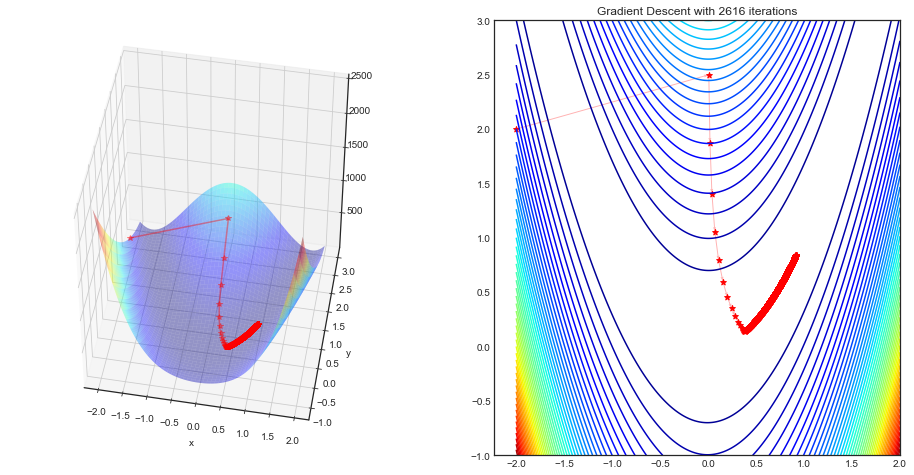

In [4]:
x = np.linspace(-2,2,250)
y = np.linspace(-1,3,250)
X, Y = np.meshgrid(x, y)
Z = Rosenbrock(X, Y)

# Angles needed for quiver plot
anglesx = iter_x[1:] - iter_x[:-1]
anglesy = iter_y[1:] - iter_y[:-1]

%matplotlib inline
fig = plt.figure(figsize = (16,8))

# Surface plot
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(X,Y,Z,rstride = 5, cstride = 5, cmap = 'jet', alpha = .4, edgecolor = 'none' )
ax.plot(iter_x,iter_y, Rosenbrock(iter_x,iter_y),color = 'r', marker = '*', alpha = .4)

ax.view_init(45, 280)
ax.set_xlabel('x')
ax.set_ylabel('y')

# Contour plot
ax = fig.add_subplot(1, 2, 2)
ax.contour(X,Y,Z, 50, cmap = 'jet')
# Plotting the iterations and intermediate values
ax.scatter(iter_x,iter_y,color = 'r', marker = '*')
ax.quiver(iter_x[:-1], iter_y[:-1], anglesx, anglesy, scale_units = 'xy', angles = 'xy', scale = 1, color = 'r', alpha = .3)
ax.set_title('Gradient Descent with {} iterations'.format(len(iter_count)))

plt.show()


<h3 id="Comments">Comments<a class="anchor-link" href="#Comments">¶</a></h3><p>As expected, the algorithm finds the "valley" - however it struggles to reach the global minimum and gets stuck in a zigzag behaviour. Even after several thousand iterations, the minimum is not found. Trying different initial values leads to vastly different results, many of which are not close to the global minimum, and in many cases leading to infinite values (i.e. algorithm does not converge)</p>
<p>The behaviour is also very dependent on the initial choice of the $\gamma$ value.</p>
<h2 id="Gradient-descent-on-a-simpler-function-(quadratic)">Gradient descent on a simpler function (quadratic)<a class="anchor-link" href="#Gradient-descent-on-a-simpler-function-(quadratic)">¶</a></h2><p>Consider a simpler function to optimize.</p>
<p>$f(x,y) = .01x^2 + .1y^2$</p>
<p>As this function is convex and significantly easier to optimize, we would expect the Gradient Descent algorithm to give better results than for the Rosenbrock function.</p>


In [5]:
def f(x,y):
    return .01*x**2 + .1*y**2

def Grad_f(x,y):
    g1 = 2*.01*x
    g2 = 2*.1*y
    return np.array([g1,g2]) 

root,iter_x,iter_y, iter_count = Gradient_Descent(Grad_f,-2,-2,1)

[-4.85736291e-03 -2.64147266e-29]


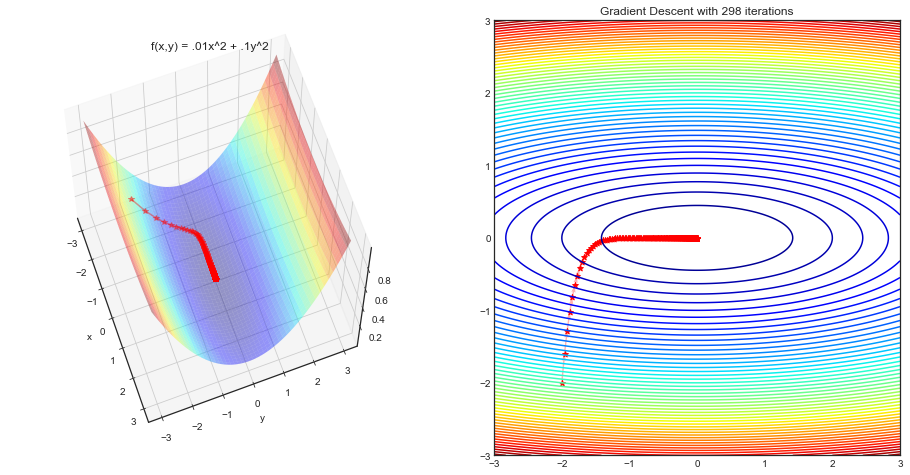

In [6]:
x = np.linspace(-3,3,250)
y = np.linspace(-3,3,250)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

#Angles needed for quiver plot
anglesx = iter_x[1:] - iter_x[:-1]
anglesy = iter_y[1:] - iter_y[:-1]

%matplotlib inline
fig = plt.figure(figsize = (16,8))

#Surface plot
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(X,Y,Z,rstride = 5, cstride = 5, cmap = 'jet', alpha = .4, edgecolor = 'none' )
ax.plot(iter_x,iter_y, f(iter_x,iter_y),color = 'r', marker = '*', alpha = .4)
ax.set_title('f(x,y) = .01x^2 + .1y^2')

ax.view_init(65, 340)
ax.set_xlabel('x')
ax.set_ylabel('y')

#Contour plot
ax = fig.add_subplot(1, 2, 2)
ax.contour(X,Y,Z, 50, cmap = 'jet')
#Plotting the iterations and intermediate values
ax.scatter(iter_x,iter_y,color = 'r', marker = '*')
ax.quiver(iter_x[:-1], iter_y[:-1], anglesx, anglesy, scale_units = 'xy', angles = 'xy', scale = 1, color = 'r', alpha = .3)
ax.set_title('Gradient Descent with {} iterations'.format(len(iter_count)))

plt.show()


<h2 id="Improving-the-Gradient-descent-with-line-search-(to-be-completed)">Improving the Gradient descent with line search (to be completed)<a class="anchor-link" href="#Improving-the-Gradient-descent-with-line-search-(to-be-completed)">¶</a></h2><p>We can improve the algorithm by replacing the constant $\gamma$ value with a value that changes at each step.</p>
<p><em>To be completed</em></p>
<hr/>



<h2 id="Newton's-method">Newton's method<a class="anchor-link" href="#Newton's-method">¶</a></h2><p>Similarly to the root finding algorithm, Newton's method for finding extrema takes the form:</p>
<p>$x_{n+1} = x_n - \frac{f'(x_n)}{f''(x_n)}$</p>
<p>Extending to multivariate case, we replace the derivative with the gradient $\nabla f(x_n)$ and the reciprocal of the second derivative with the inverse of the Hessian matrix:</p>
<p>$x_{n+1} = x_n - [\mathbf{H} \ f(x_n)]^{-1} \nabla f(x_n)$</p>
<p>Finding the inverse of the Hessian in high dimensions can be computationally expensive. In such cases, instead of inverting the Hessian it is better to calculate the vector $\delta x = x_{n+1} - x_n$ as the solution to the linear system of equations:</p>
<p>$[\mathbf{H} \ f(x_n)] \nabla \mathbf{x_n} = - \nabla f(x_n)$</p>
<p>Note that since Newton's method converges quadratically, any (smooth) quadratic function will be optimized in one step, as is shown in the trivial example below.</p>
<p><strong>Example 1) Simple case</strong></p>
<p>$f(x_1, x_2) = 0.5 x_1^2 + 2.5x_2^2$ where $\mathbf{x} = \begin{bmatrix}x_1 \\ x_2 \end{bmatrix}$</p>
<p>$\nabla \ f(x_1,x_2) = \begin{bmatrix}x_1 \\ 5x_2 \end{bmatrix} $ and $H = J(\nabla^T) = \begin{bmatrix} 1 & 0 \\ 0 & 5 \end{bmatrix} $</p>
<p>$H^{-1} = \begin{bmatrix}1 & 0 \\ 0 & 1/5 \end{bmatrix}$</p>
<p>$\mathbf{x_{n+1} = x_n - H^{-1}_n} \nabla f(\mathbf{x_n})$</p>
<p>$\begin{bmatrix}x_1\\ x_2 \end{bmatrix}_{n+1} := \begin{bmatrix}x_1\\ x_2 \end{bmatrix}_{n} -  \begin{bmatrix}1 & 0 \\ 0 & 1/5 \end{bmatrix}  \begin{bmatrix}x_1 \\ 5x_2 \end{bmatrix}_n = \begin{bmatrix}x_1 \\ x_2 \end{bmatrix}_n - \begin{bmatrix}x_1 \\ x_2 \end{bmatrix}_n  = \begin{bmatrix}0 \\ 0 \end{bmatrix}$</p>


In [7]:
def Newton_Raphson_Optimize(Grad, Hess, x,y, epsilon=0.000001, nMax = 200):
    #Initialization
    i = 0
    iter_x, iter_y, iter_count = np.empty(0),np.empty(0), np.empty(0)
    error = 10
    X = np.array([x,y])
    
    #Looping as long as error is greater than epsilon
    while np.linalg.norm(error) > epsilon and i < nMax:
        i +=1
        iter_x = np.append(iter_x,x)
        iter_y = np.append(iter_y,y)
        iter_count = np.append(iter_count ,i)   
        print(X) 
        
        X_prev = X
        # N.B.: x_{n+1} = x_n - [\mathbf{H} \ f(x_n)]^{-1} \nabla f(x_n
        X = X - np.linalg.inv(Hess(x,y)) @ Grad(x,y)
        error = X - X_prev
        x,y = X[0], X[1]
          
    return X, iter_x,iter_y, iter_count

root,iter_x,iter_y, iter_count = Newton_Raphson_Optimize(Grad_Rosenbrock,Hessian_Rosenbrock,-2,2)

[-2  2]
[-1.9925187   3.97007481]
[ 0.96687269 -7.82315462]
[0.96689159 0.93487935]
[1.         0.99890383]
[1. 1.]



<h3 id="Plotting-the-iterations-on-top-of-the-surface-and-contour-plot">Plotting the iterations on top of the surface and contour plot<a class="anchor-link" href="#Plotting-the-iterations-on-top-of-the-surface-and-contour-plot">¶</a></h3>


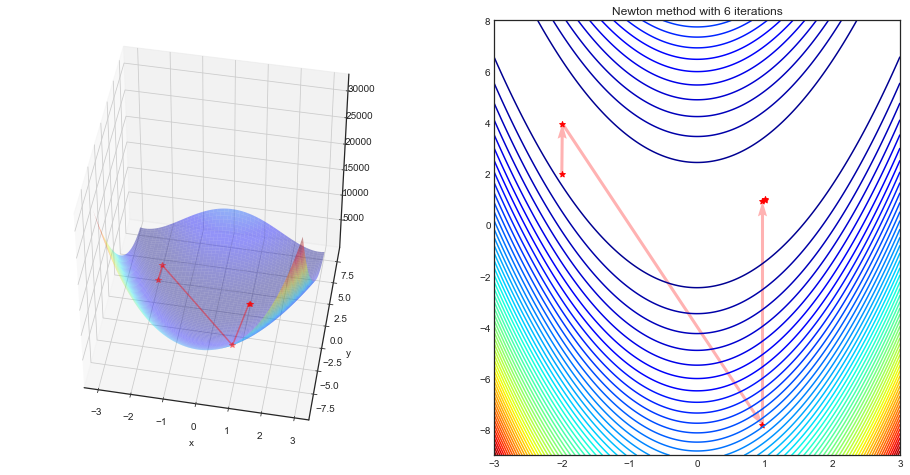

In [8]:
x = np.linspace(-3,3,250)
y = np.linspace(-9,8,350)
X, Y = np.meshgrid(x, y)
Z = Rosenbrock(X, Y)

# Angles needed for quiver plot
anglesx = iter_x[1:] - iter_x[:-1]
anglesy = iter_y[1:] - iter_y[:-1]

%matplotlib inline
fig = plt.figure(figsize = (16,8))

# Surface plot
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(X,Y,Z,rstride = 5, cstride = 5, cmap = 'jet', alpha = .4, edgecolor = 'none' )
ax.plot(iter_x,iter_y, Rosenbrock(iter_x,iter_y),color = 'r', marker = '*', alpha = .4)

# Rotate the initialization to help viewing the graph
ax.view_init(45, 280)
ax.set_xlabel('x')
ax.set_ylabel('y')

# Contour plot
ax = fig.add_subplot(1, 2, 2)
ax.contour(X,Y,Z, 60, cmap = 'jet')
# Plotting the iterations and intermediate values
ax.scatter(iter_x,iter_y,color = 'r', marker = '*')
ax.quiver(iter_x[:-1], iter_y[:-1], anglesx, anglesy, scale_units = 'xy', angles = 'xy', scale = 1, color = 'r', alpha = .3)
ax.set_title('Newton method with {} iterations'.format(len(iter_count)))

plt.show()


<h3 id="Comments">Comments<a class="anchor-link" href="#Comments">¶</a></h3><p>The Newton Raphson method converges extremely rapidly to the global solution, despite the significant challenge posed by the Rosenbrock function. Irrespective of the starting point (within the scope of the graph above) the minimum is found within 4 - 6 iterations. Compare this to the several thousand iterations required by the gradient descent approach.</p>



<h3 id="Newton-Raphson-optimization-using-Scipy">Newton Raphson optimization using Scipy<a class="anchor-link" href="#Newton-Raphson-optimization-using-Scipy">¶</a></h3>


In [9]:
from scipy.optimize import minimize, rosen, rosen_der, rosen_hess
x0 = [-3,10]
# Ref.: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html
res = minimize(rosen, x0, method='trust-exact', jac=rosen_der, hess = rosen_hess, tol = 1e-4, callback = print)

[-3.34156028 10.93985987]
[-3.24765428 10.53843996]
[-2.94123005  8.56205209]
[-2.73110304  7.41477048]
[-2.35156609  5.3858148 ]
[-2.23913388  5.00107952]
[-2.23913388  5.00107952]
[-2.12619562  4.51398375]
[-1.89449812  3.54119123]
[-1.62108086  2.55314617]
[-1.45676419  2.09516192]
[-1.45676419  2.09516192]
[-1.28489394  1.62555025]
[-1.28489394  1.62555025]
[-1.18377752  1.39665024]
[-0.9852495   0.93772951]
[-0.72394346  0.45581329]
[-0.60631767  0.35378529]
[-0.60631767  0.35378529]
[-0.43823373  0.16838839]
[-0.18732427 -0.02786518]
[-0.09996392  0.00236095]
[-0.09996392  0.00236095]
[ 0.02424149 -0.01383994]
[0.27536853 0.01276304]
[0.29259222 0.07926026]
[0.39861302 0.14551616]
[0.56224523 0.2893442 ]
[0.63112767 0.39357734]
[0.78422169 0.59121977]
[0.82170416 0.6737928 ]
[0.82170416 0.6737928 ]
[0.85384016 0.7273989 ]
[0.91640806 0.83561331]
[0.96188578 0.92315603]
[0.98884745 0.97709235]
[0.99858438 0.99707596]
[0.99997366 0.99994538]
[0.99999999 0.99999998]



<h2 id="Comparing-Newton-and-Gradient-Descent-in-presence-of-a-single-saddle-point">Comparing Newton and Gradient Descent in presence of a single saddle point<a class="anchor-link" href="#Comparing-Newton-and-Gradient-Descent-in-presence-of-a-single-saddle-point">¶</a></h2><p>$f_2(x,y) = .01x^2 - .1y^2$</p>
<p>$f'_2(x,y) = .02x - .2y$</p>


In [10]:
def f_2(x,y):
    return .01*x**2 - .1*y**2

def Grad_f_2(x,y):
    g1 = 2*.01*x
    g2 = - 2*.1*y
    return np.array([g1,g2])

def Hessian_f_2(x,y):
    return np.array([[.02,0],[0,-.2]]) 

[-1.50866182 -0.95396217]
[-2.   -0.01]
[0. 0.]


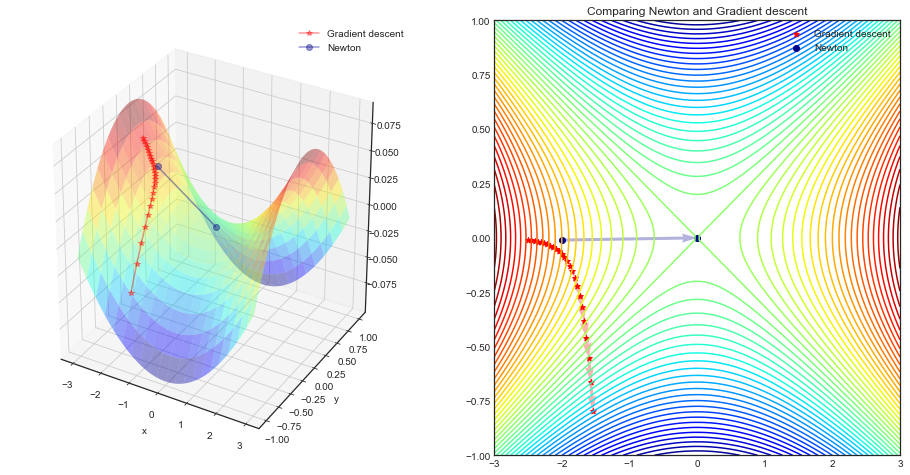

In [11]:
root_gd,iter_x_gd,iter_y_gd, iter_count_gd = Gradient_Descent(Grad_f_2,-2.5,-0.010,1, nMax = 25)
root_nr,iter_x_nr,iter_y_nr, iter_count_nr = Newton_Raphson_Optimize(Grad_f_2,Hessian_f_2,-2,-.01, nMax = 25)

x = np.linspace(-3,3,100)
y = np.linspace(-1,1,100)
X, Y = np.meshgrid(x, y)
Z = f_2(X, Y)

#Angles needed for quiver plot
anglesx = iter_x_gd[1:] - iter_x_gd[:-1]
anglesy = iter_y_gd[1:] - iter_y_gd[:-1]
anglesx_nr = iter_x_nr[1:] - iter_x_nr[:-1]
anglesy_nr = iter_y_nr[1:] - iter_y_nr[:-1]

%matplotlib inline
fig = plt.figure(figsize = (16,8))

#Surface plot
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(X,Y,Z,rstride = 5, cstride = 5, cmap = 'jet', alpha = .4, edgecolor = 'none' )
ax.plot(iter_x_gd,iter_y_gd, f_2(iter_x_gd,iter_y_gd),color = 'r', marker = '*', alpha = .4, label = 'Gradient descent')
ax.plot(iter_x_nr,iter_y_nr, f_2(iter_x_nr,iter_y_nr),color = 'darkblue', marker = 'o', alpha = .4, label = 'Newton')
ax.legend()

#Rotate the initialization to help viewing the graph
#ax.view_init(45, 280)
ax.set_xlabel('x')
ax.set_ylabel('y')

#Contour plot
ax = fig.add_subplot(1, 2, 2)
ax.contour(X,Y,Z, 60, cmap = 'jet')
#Plotting the iterations and intermediate values
ax.scatter(iter_x_gd,iter_y_gd,color = 'r', marker = '*', label = 'Gradient descent')
ax.quiver(iter_x_gd[:-1], iter_y_gd[:-1], anglesx, anglesy, scale_units = 'xy', angles = 'xy', scale = 1, color = 'r', alpha = .3)
ax.scatter(iter_x_nr,iter_y_nr,color = 'darkblue', marker = 'o',  label = 'Newton')
ax.quiver(iter_x_nr[:-1], iter_y_nr[:-1], anglesx_nr, anglesy_nr, scale_units = 'xy', angles = 'xy', scale = 1, color = 'darkblue', alpha = .3)
ax.legend()

ax.set_title('Comparing Newton and Gradient descent')

plt.show()


<h2 id="Comparing-Newton-and-Gradient-Descent-in-presence-of-a-multiple-saddle-points">Comparing Newton and Gradient Descent in presence of a multiple saddle points<a class="anchor-link" href="#Comparing-Newton-and-Gradient-Descent-in-presence-of-a-multiple-saddle-points">¶</a></h2><h3 id="Using-the-himmerlblau-function"><a href="https://en.wikipedia.org/wiki/Himmelblau%27s_function">Using the himmerlblau function</a><a class="anchor-link" href="#Using-the-himmerlblau-function">¶</a></h3><p>$f(x,y)=(x^{2}+y-11)^{2}+(x+y^{2}-7)^{2}.\quad $</p>
<p>$\nabla f(x,y) = [2 (-7 + x + y^2 + 2 x (-11 + x^2 + y)), 2 (-11 + x^2 + y + 2 y (-7 + x + y^2))] $</p>
<p>$H f(x,y) = \begin{bmatrix} 4 (x^2 + y - 11) + 8 x^2 + 2 & 4 x + 4 y \\
4 x + 4 y & 4 (x + y^2 - 7) + 8 y^2 + 2) \end{bmatrix}$</p>


In [12]:
def Himmer(x,y):
    return (x**2 + y - 11)**2 + ( x + y**2 - 7 )**2

def Grad_Himmer(x,y):
    return np.array([2 * (-7 + x + y**2 + 2 * x * (-11 + x**2 + y)), 2 * (-11 + x**2 + y + 2 * y * (-7 + x + y**2))])

def Hessian_Himmer(x,y):
    h11 = 4 * (x**2 + y - 11) + 8 * x**2 + 2
    h12 = 4 * x + 4 * y
    h21 = 4 * x + 4 * y 
    h22 = 4 * (x + y**2 - 7) + 8 * y**2 + 2
    
    return np.array([[h11,h12],[h21,h22]]) 

In [13]:
root_gd,iter_x_gd,iter_y_gd, iter_count_gd = Gradient_Descent(Grad_Himmer,0.5,-2,gamma = 0.001, epsilon=0.01, nMax = 1000)
#(Grad,x,y, gamma = 0.00125, epsilon=0.0001, nMax = 10000 )

[ 3.49508119 -1.77829953]


In [14]:
root_nr,iter_x_nr,iter_y_nr, iter_count_nr = Newton_Raphson_Optimize(Grad_Himmer,Hessian_Himmer,0.5,-2, nMax = 50)

[ 0.5 -2. ]
[-0.15721649 -1.93513746]
[-0.1278321  -1.95412029]
[-0.12796132 -1.95371518]


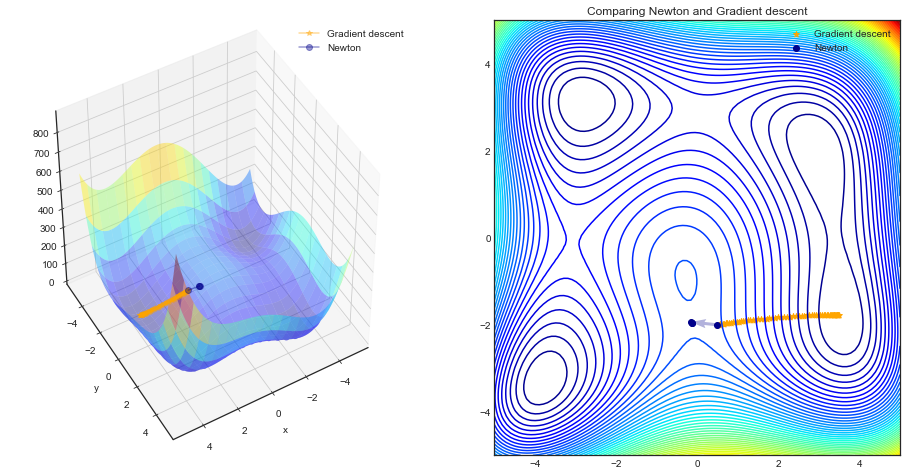

In [15]:
x = np.linspace(-5,5,100)
y = np.linspace(-5,5,100)
X, Y = np.meshgrid(x, y)
Z = Himmer(X, Y)

#Angles needed for quiver plot
anglesx = iter_x_gd[1:] - iter_x_gd[:-1]
anglesy = iter_y_gd[1:] - iter_y_gd[:-1]
anglesx_nr = iter_x_nr[1:] - iter_x_nr[:-1]
anglesy_nr = iter_y_nr[1:] - iter_y_nr[:-1]

%matplotlib inline
fig = plt.figure(figsize = (16,8))

#Surface plot
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(X,Y,Z,rstride = 5, cstride = 5, cmap = 'jet', alpha = .4, edgecolor = 'none' )
ax.plot(iter_x_gd,iter_y_gd, f_2(iter_x_gd,iter_y_gd),color = 'orange', marker = '*', alpha = .4, label = 'Gradient descent')
ax.plot(iter_x_nr,iter_y_nr, f_2(iter_x_nr,iter_y_nr),color = 'darkblue', marker = 'o', alpha = .4, label = 'Newton')
ax.legend()

#Rotate the initialization to help viewing the graph
ax.view_init(45, 60)
ax.set_xlabel('x')
ax.set_ylabel('y')

#Contour plot
ax = fig.add_subplot(1, 2, 2)
ax.contour(X,Y,Z, 60, cmap = 'jet')

#Plotting the iterations and intermediate values
ax.scatter(iter_x_gd,iter_y_gd,color = 'orange', marker = '*', label = 'Gradient descent')
ax.quiver(iter_x_gd[:-1], iter_y_gd[:-1], anglesx, anglesy, scale_units = 'xy', angles = 'xy', scale = 1, color = 'orange', alpha = .3)
ax.scatter(iter_x_nr,iter_y_nr,color = 'darkblue', marker = 'o',  label = 'Newton')
ax.quiver(iter_x_nr[:-1], iter_y_nr[:-1], anglesx_nr, anglesy_nr, scale_units = 'xy', angles = 'xy', scale = 1, color = 'darkblue', alpha = .3)
ax.legend()

ax.set_title('Comparing Newton and Gradient descent')

plt.show()


<h2 id="Drawbacks-of-Newton's-method">Drawbacks of Newton's method<a class="anchor-link" href="#Drawbacks-of-Newton's-method">¶</a></h2><p>A combination of two reasons:</p>
<ul>
<li>Newton method attracts to saddle points; </li>
<li><a href="https://en.wikipedia.org/wiki/Saddle_point">saddle points</a> are common in machine learning, or in fact any multivariable optimization.</li>
</ul>
<p>Look at the function $$f=x^2-y^2$$
<a href="https://sm.ms/image/xdXo7WchJIERgSq" target="_blank"><img src="https://i.loli.net/2019/12/05/xdXo7WchJIERgSq.png" alt="EX5lC.png"></a>
</p>
<p>If you apply <a href="https://en.wikipedia.org/wiki/Newton%27s_method_in_optimization#Higher_dimensions">multivariate Newton method</a>, you get the following.
$$\mathbf{x}_{n+1} = \mathbf{x}_n - [\mathbf{H}f(\mathbf{x}_n)]^{-1} \nabla f(\mathbf{x}_n)$$</p>
<p>Let's get the <a href="https://en.wikipedia.org/wiki/Hessian_matrix">Hessian</a>:
$$\mathbf{H}= \begin{bmatrix}
  \dfrac{\partial^2 f}{\partial x_1^2} & \dfrac{\partial^2 f}{\partial x_1\,\partial x_2} & \cdots & \dfrac{\partial^2 f}{\partial x_1\,\partial x_n} \\[2.2ex]
  \dfrac{\partial^2 f}{\partial x_2\,\partial x_1} & \dfrac{\partial^2 f}{\partial x_2^2} & \cdots & \dfrac{\partial^2 f}{\partial x_2\,\partial x_n} \\[2.2ex]
  \vdots & \vdots & \ddots & \vdots \\[2.2ex]
  \dfrac{\partial^2 f}{\partial x_n\,\partial x_1} & \dfrac{\partial^2 f}{\partial x_n\,\partial x_2} & \cdots & \dfrac{\partial^2 f}{\partial x_n^2}
\end{bmatrix}.$$</p>
<p>$$\mathbf{H}= \begin{bmatrix}
  2 & 0 \\[2.2ex]
  0 & -2
\end{bmatrix}$$</p>
<p>Invert it:
$$[\mathbf{H} f]^{-1}= \begin{bmatrix}
  1/2 & 0 \\[2.2ex]
  0 & -1/2
\end{bmatrix}$$</p>
<p>Get the gradient:
$$\nabla f=\begin{bmatrix}
  2x \\[2.2ex]
  -2y 
\end{bmatrix}$$</p>
<p>Get the final equation:
$$\mathbf{\begin{bmatrix}
  x \\[2.2ex]
  y 
\end{bmatrix}}_{n+1} =  \begin{bmatrix}
  x \\[2.2ex]
  y
\end{bmatrix}_n
-\begin{bmatrix}
  1/2 & 0 \\[2.2ex]
  0 & -1/2
\end{bmatrix} \begin{bmatrix}
  2x_n \\[2.2ex]
  -2y_n 
\end{bmatrix}=
\mathbf{\begin{bmatrix}
  x \\[2.2ex]
  y 
\end{bmatrix}}_n - \begin{bmatrix}
  x \\[2.2ex]
  y
\end{bmatrix}_n=
\begin{bmatrix}
  0 \\[2.2ex]
  0
\end{bmatrix}
$$</p>
<p>So, you see how the Newton method led you to the saddle point at $x=0,y=0$.</p>
<p>In contrast, the gradient descent method will not lead to the saddle point. The gradient is zero at the saddle point, but a tiny step out would pull the optimization away as you can see from the gradient above - its gradient on y-variable is negative.</p>
<p>Source: <a href="https://stats.stackexchange.com/questions/253632/why-is-newtons-method-not-widely-used-in-machine-learning/253655">https://stats.stackexchange.com/questions/253632/why-is-newtons-method-not-widely-used-in-machine-learning/253655</a></p>



<h2 id="A-comparison-between-gradient-descent-and-Newton's-method">A comparison between gradient descent and Newton's method<a class="anchor-link" href="#A-comparison-between-gradient-descent-and-Newton's-method">¶</a></h2><p>You asked two questions: Why don't more people use Newton's method, and why do so many
people use stochastic gradient descent? These questions have different answers, because
there are many algorithms that lessen the computational burden of Newton's method
but often work better than SGD.</p>
<p>First: Newton's Method takes a long time per iteration and is memory-intensive.
As jwimberley points out, Newton's Method requires computing the second derivative, $H$,
which is $O(N^2)$, where $N$ is the number of features, while computing the gradient,
$g$, is only $O(N)$. But the next step is $H^{-1} g$, which is $O(N^3)$ to compute.
So while computing the Hessian is expensive, inverting it or solving least squares is often even worse.
(If you have sparse features, the asymptotics look better, but other methods also perform
better, so sparsity doesn't make Newton <em>relatively</em> more appealing.)</p>
<p>Second, many methods, not just gradient descent, are used more often than Newton;
they are often knockoffs of Newton's method, in the sense that
they approximate a Newton step at a lower computational cost per step but take
more iterations to converge. Some examples:</p>
<ul>
<li><p>Because of the expense of inverting the Hessian,
"quasi-Newton" methods like BFGS approximate the <em>inverse</em> Hessian,
$H^{-1}$, by looking at how the gradient has changed over the last
few steps.</p>
</li>
<li><p>BFGS is still very memory-intensive in
high-dimensional settings because it requires storing the entire
$O(N^2)$ approximate inverse Hessian. Limited memory BFGS (L-BFGS) calculates the next
step direction as the approximate inverse Hessian times the gradient,
but it only requires storing the last several gradient updates; it
doesn't explicitly store the approximate inverse Hessian.</p>
</li>
<li><p>When
you don't want to deal with approximating second derivatives at all,
gradient descent is appealing because it only uses only first-order
information. Gradient descent is implicitly approximating the inverse
Hessian as the learning rate times the identity matrix. I,
personally, rarely use gradient descent: L-BFGS is just as easy to
implement, since it only requires specifying the objective function
and gradient; it has a better inverse Hessian approximation than
gradient descent; and because gradient descent requires tuning the
learning rate.</p>
</li>
<li><p>Sometimes you have a very large number of
observations (data points),  but you could learn almost as well from
a smaller number of observations. When that is the case, you can use
"batch methods", like stochastic gradient descent, that cycle through
using subsets of the observations.</p>
</li>
</ul>



<h3 id="More-advanced-discussion">More advanced discussion<a class="anchor-link" href="#More-advanced-discussion">¶</a></h3><p>PRO</p>
<p>Indeed the ratio of the number of saddle points to local minima increases exponentially with the dimensionality N.</p>
<p>While gradient descent dynamics are repelled away from a saddle point to lower error by following directions of negative curvature, ...the Newton method does not treat saddle points appropriately; as argued below, saddle-points instead become attractive under the Newton dynamics.</p>
<p><a href="https://arxiv.org/pdf/1406.2572.pdf">https://arxiv.org/pdf/1406.2572.pdf</a></p>
<p>CONS</p>
<p>More people <em>should</em> be using Newton's method in machine learning*. I say this as someone with a background in numerical optimization, who has dabbled in machine learning over the past couple of years.</p>
<p>The drawbacks in answers here (and even in the literature) are not an issue if you use Newton's method correctly. Moreover, the drawbacks that do matter also slow down gradient descent the same amount or more, but through less obvious mechanisms.</p>
<ul>
<li><p>Using linesearch with the Wolfe conditions or using or trust regions prevents convergence to saddle points. A proper gradient descent implementation should be doing this too. The <a href="https://arxiv.org/pdf/1406.2572.pdf">paper</a> referenced in <a href="https://stats.stackexchange.com/a/253647/14415">Cam.Davidson.Pilon's answer</a> points out problems with "Newton's method" in the presence of saddle points, but the fix they advocate is also a Newton method.</p>
</li>
<li><p>Using Newton's method does not require constructing the whole (dense) Hessian; you can apply the inverse of the Hessian to a vector with iterative methods that only use matrix-vector products (e.g., Krylov methods like conjugate gradient). See, for example, the CG-Steihaug trust region method.</p>
</li>
<li><p>You can compute Hessian matrix-vector products efficiently by solving two higher order adjoint equations of the same form as the adjoint equation that is already used to compute the gradient (e.g., the work of two backpropagation steps in neural network training).</p>
</li>
<li><p>Ill conditioning slows the convergence of iterative linear solvers, but it also slows gradient descent equally or worse. Using Newton's method instead of gradient descent shifts the difficulty from the nonlinear optimization stage (where not much can be done to improve the situation) to the linear algebra stage (where we can attack it with the entire arsenal of numerical linear algebra preconditioning techniques).</p>
</li>
<li><p>Also, the computation shifts from "many many cheap steps" to "a few costly steps", opening up more opportunities for parallelism at the sub-step (linear algebra) level.</p>
</li>
</ul>
<p>For background information about these concepts, I recommend the book <a href="http://www.springer.com/us/book/9780387303031">"Numerical Optimization"</a> by Nocedal and Wright.</p>
<p>*Of course, Newton's method will not help you with L1 or other similar compressed sensing/sparsity promoting penalty functions, since they lack the required smoothness.</p>



<h2 id="Appendix---code-snipets-and-to-do">Appendix - code snipets and to do<a class="anchor-link" href="#Appendix---code-snipets-and-to-do">¶</a></h2>



<h3 id="Rosenbrock-function-returning-vector-result">Rosenbrock function returning vector result<a class="anchor-link" href="#Rosenbrock-function-returning-vector-result">¶</a></h3>


In [16]:
def rosen(x):
    """Generalized n-dimensional version of the Rosenbrock function"""
    return sum(100*(x[1:]-x[:-1]**2.0)**2.0 +(1-x[:-1])**2.0)

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = rosen(np.vstack([X.ravel(), Y.ravel()])).reshape((100,100))

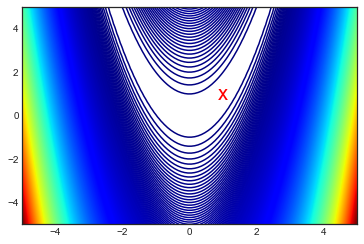

In [17]:
# Note: the global minimum is at (1,1) in a tiny contour island
plt.contour(X, Y, Z, 1000, cmap = 'jet')
plt.text(1, 1, 'x', va='center', ha='center', color='red', fontsize=20);


<h3 id="Finding-non-linear-solutions---Multivariate">Finding non linear solutions - Multivariate<a class="anchor-link" href="#Finding-non-linear-solutions---Multivariate">¶</a></h3><p><strong>Example:</strong></p>
<p>$f_2: (x,y) = x^4 + 2x^2y^2 + y^4$ where $x,y \in \mathbb{R}$</p>
<p>$f_3: (x,y) = x^2 + y^2$ where $x,y \in \mathbb{R}$</p>
<h3 id="Defining-and-plotting-the-functions">Defining and plotting the functions<a class="anchor-link" href="#Defining-and-plotting-the-functions">¶</a></h3>


In [18]:
def f2(x,y):
    return x**4 + 2*x**2 * y**2 + y**4

def f3(x,y):
    return x**2 + y**2

x = np.linspace(-10,10,50)
y = np.linspace(-10,10,50)
X, Y = np.meshgrid(x, y)
Z2 = f2(X, Y)
Z3 = f3(X, Y)

Text(0.5, 0.92, 'Function3')

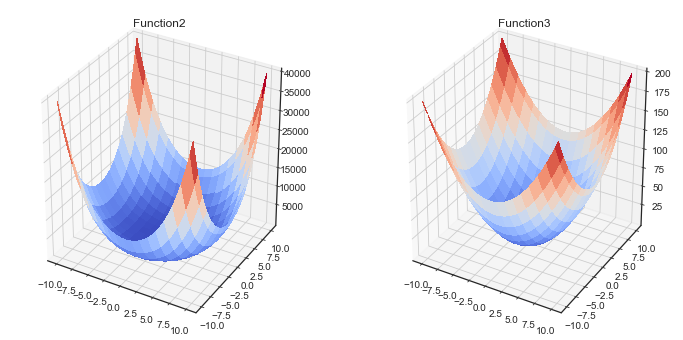

In [19]:
%matplotlib inline
fig = plt.figure(figsize = (12,6))

#First plot: function 2
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(X,Y,Z2,rstride = 3, cstride = 3, cmap = 'coolwarm', linewidth = 0, antialiased = False )
ax.set_title("Function2")

#Second plot: function 3
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot_surface(X,Y,Z3,rstride = 3, cstride = 3, cmap = 'coolwarm', linewidth = 0, antialiased = False )
ax.set_title("Function3")


<h3 id="Newton-method---Multivariate">Newton method - Multivariate<a class="anchor-link" href="#Newton-method---Multivariate">¶</a></h3><p>Generalizing the 1D approach by:</p>
<p>$x_{n+1} = x_n - J^{-1} \ f(x_n)$</p>
<ul>
<li>$x$ and $f(x)$ are now vectors</li>
<li>$J^{-1}$ is the inverse Jacobian matrix. </li>
<li>In general the Jacobian is not square and cannot be inverted, so we use the generalized inverse: $(J^TJ)^{-1}J^T$</li>
</ul>
<p>$x_{n+1} = x_n - (J^TJ)^{-1}J^T \ f(x_n)$</p>
<p><strong>Example for f3</strong></p>
<p>$f_3: (x,y) = x^2 + y^2$ where $x,y \in \mathbb{R}$</p>
<p>$f'_3: (x,y) = 2x + 2y$</p>
<p>$ \frac{d \ f_3}{dx} = 2x $ and $ \frac{d \ f_3}{dy} = 2y $</p>
<p>$J = \left( 2x , 2y \right)$</p>


In [20]:
def J3(x,y):
    return np.array([2*x,2*y])

def df3dx(x,y):
    return 2*x + 2*y